<a href="https://colab.research.google.com/github/saran459/OIBSIP-TASK-5-/blob/main/TASK_5_(retail_sales_analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131706 entries, 0 to 131705
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   S.NO            131706 non-null  int64  
 1   Date            131706 non-null  object 
 2   Customer_ID     131706 non-null  int64  
 3   Transaction_ID  131706 non-null  int64  
 4   SKU_Category    131706 non-null  object 
 5   SKU             131706 non-null  object 
 6   Quantity        131706 non-null  float64
 7   Sales_Amount    131706 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 8.0+ MB


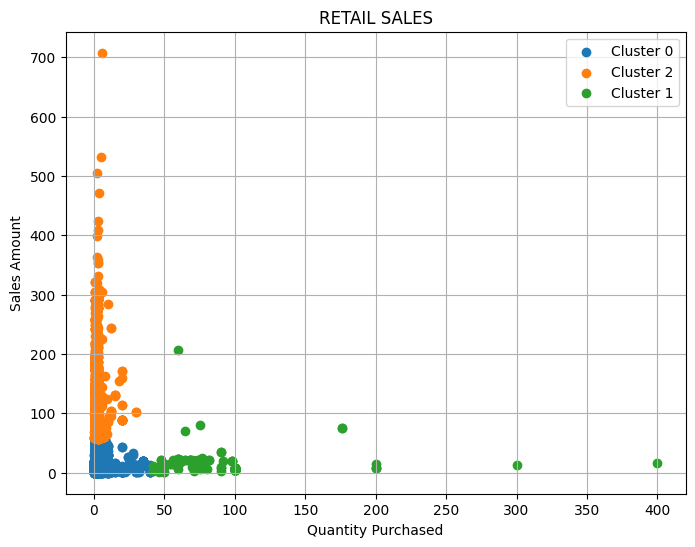

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/content/retail sales.csv')
df.info()
df.isnull().sum()
df.mode()
# Select relevant features for clustering
features = df[['Quantity', 'Sales_Amount']].dropna()
# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
# Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
# Add cluster labels to the original dataframe
features['Cluster'] = clusters
# Visualize the clusters
plt.figure(figsize=(8, 6))
for cluster in features['Cluster'].unique():
    cluster_data = features[features['Cluster'] == cluster]
    plt.scatter(cluster_data['Quantity'], cluster_data['Sales_Amount'], label=f'Cluster {cluster}')

plt.xlabel('Quantity Purchased')
plt.ylabel('Sales Amount')
plt.title('RETAIL SALES')
plt.legend()
plt.grid(True)
plt.show()